# Result = 31%

# Default Setup

In [0]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

     |████████████████████████████████| 2.0MB 3.8MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Plain Classification

1632569 1075


Classification: 100%|██████████| 326514/326514 [00:05<00:00, 56158.29it/s]



              precision    recall  f1-score   support

         1.0       0.24      0.62      0.34     19091
         2.0       0.13      0.14      0.14     14014
         3.0       0.39      0.10      0.16     25566
         4.0       0.36      0.06      0.10     49281
         5.0       0.77      0.87      0.82    218562

    accuracy                           0.64    326514
   macro avg       0.38      0.36      0.31    326514
weighted avg       0.62      0.64      0.60    326514


 Accuracy: 0.640

[ updating evaluations cache ]


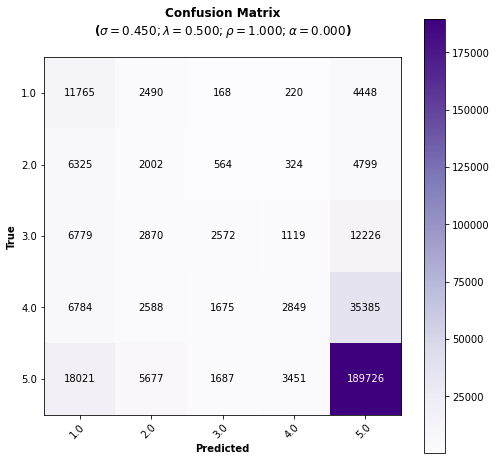

0.31043289791573303

In [0]:
import json
files = []
text = []
labels = []
failed_counter = 0

for _, _, file_names in os.walk(path_root + data_root + "AmazonReview2018"):
  for file_name in file_names:
    if '.json' in file_name:
      files.append(file_name)

for j_file in files[:5]:
  with open(path_root + data_root + "AmazonReview2018/" + j_file, "r") as json_file:
    for line in json_file:
      json_data = json.loads(line)
      try:
        text.append(json_data['reviewText'])
        labels.append(str(json_data['overall']))
      except KeyError:
        failed_counter += 1

print(len(text), failed_counter)
X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)

clf = SS3()
clf.fit(X_train, y_train)
Evaluation.test(clf, X_val, y_val, metric="f1-score")

## Add Paragraph Capabilities

Changed 514264 from 1306055 samples
Changed 128946 from 326514 samples


Training on '5.0': 100%|██████████| 5/5 [03:40<00:00, 44.19s/it]



              precision    recall  f1-score   support

         1.0       0.24      0.59      0.34     19091
         2.0       0.14      0.12      0.12     14014
         3.0       0.40      0.05      0.08     25566
         4.0       0.30      0.11      0.16     49281
         5.0       0.76      0.86      0.81    218562

    accuracy                           0.63    326514
   macro avg       0.37      0.34      0.30    326514
weighted avg       0.61      0.63      0.60    326514


 Accuracy: 0.635



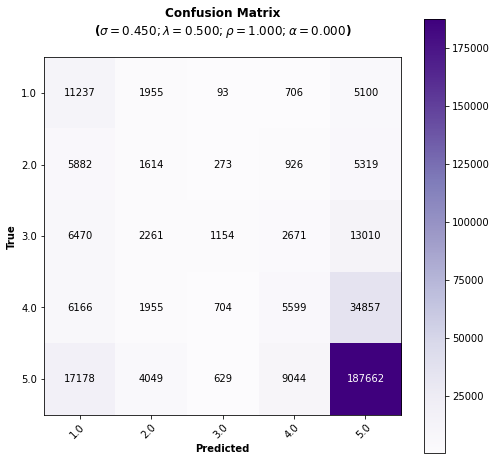

0.30372339621642774

In [0]:
def replicate_reviews(text, labels):
  changed = 0
  par_text = []
  for index in range(len(text)):
    cur_text = text[index]
    res_text = ""
    while cur_text.count('.') > 2:
      res_text += '.'.join(cur_text.split('.')[:2])
      res_text += '.\n'
      cur_text = '.'.join(cur_text.split('.')[2:])
    if res_text:
      changed += 1
      par_text.append(res_text)
    else:
      par_text.append(cur_text)
  print("Changed {} from {} samples".format(changed, len(text)))
  return par_text, labels

X_train_par, y_train_par = replicate_reviews(X_train, y_train)
X_val_par, y_val_par = replicate_reviews(X_val, y_val)

clf = SS3()
clf.fit(X_train_par, y_train_par)
Evaluation.test(clf, X_val_par, y_val_par, metric="f1-score")